# Step 1: Import Necessary Libraries

In [7]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Step 2: Load and Prepare the Data

## Load the JSON data

In [8]:
# Load the dataset
df = pd.read_json('istanbul_emlakjet_all_records_cleann.json')

# Display the first few rows of the DataFrame
df.head()


,id,categoryTypeName,tradeTypeName,estateTypeName,title,url,images,locationSummary,quickInfos,priceDetail,description,info,location
0,14869600,konut,satılık,yazlık,satılık 4+1 bahçe katı yazlık daire,https://imaj.emlakjet.com/ilan/satilik-41-bahc...,[https://imaj.emlakjet.com/listing/14869600/74...,adalar - kınalıada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: Bahçe katı,"{'trendType': None, 'previousCurrency': None, ...",tekinay'da satılık 4+1 bahçe katı yazlık daire...,"{'id': '14869600', 'created_at': '2024-03-17',...","{'summary': 'Adalar - Kınalıada Mahallesi', 'c..."
1,14794365,konut,satılık,daire,büyükada i̇do i̇skelesine yakın konumda 3+1 bl...,https://imaj.emlakjet.com/ilan/buyukada-ido-is...,[https://imaj.emlakjet.com/listing/14794365/4E...,adalar - nizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: Düz Giriş (Zemin),"{'trendType': None, 'previousCurrency': None, ...",mega emlak'tan \n\nbüyükada yi̇rmi̇üç ni̇san c...,"{'id': '14794365', 'created_at': '2024-03-02',...","{'summary': 'Adalar - Nizam Mahallesi', 'city'..."
2,14780556,konut,satılık,daire,heybeliada muhteşem deniz manzaralı sahile yak...,https://imaj.emlakjet.com/ilan/heybeliada-muht...,[https://imaj.emlakjet.com/listing/14780556/1F...,adalar - heybeliada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 4. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da tamamen yenilenmiş deniz manzara...,"{'id': '14780556', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
3,14780555,konut,satılık,daire,adalar heybeliada’da satılık 3+1 kat mülkiyetli,https://imaj.emlakjet.com/ilan/adalar-heybelia...,[https://imaj.emlakjet.com/listing/14780555/28...,adalar - heybeliada mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 3. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da satılık 3+1kat mülkiyetli\n\nhey...,"{'id': '14780555', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
4,14771773,konut,satılık,yalı,prenses adalari heybeli̇de muhteşem deni̇z yal...,https://imaj.emlakjet.com/ilan/prenses-adalari...,[https://imaj.emlakjet.com/listing/14771773/BD...,adalar - heybeliada mahallesi,Oda Sayısı: 9+ Oda,"{'trendType': None, 'previousCurrency': None, ...",-prenses adalari heybeli̇ adada\n\n250 m2 araz...,"{'id': '14771773', 'created_at': '2024-02-27',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."


## Data Preparation

In [9]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'priceDetail',
       'description', 'info', 'location'],
      dtype='object')


In [10]:
if 'priceDetail' in df.columns:
    price_details = pd.json_normalize(df['priceDetail'])
    df = pd.concat([df.drop(['priceDetail'], axis=1), price_details], axis=1)

if 'info' in df.columns:
    info_details = pd.json_normalize(df['info'])
    df = pd.concat([df.drop(['info'], axis=1), info_details], axis=1)


In [11]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'description',
       'location', 'trendType', 'previousCurrency', 'previousPrice',
       'previousValueValid', 'currency', 'price', 'tlPrice',
       'alternativeValue', 'firstPrice', 'differenceRate', 'squareMeterPrice',
       'opportunity', 'id', 'created_at', 'updated_at', 'category',
       'trade_type', 'net_square', 'gross_square', 'room_count', 'build_age',
       'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_o

In [12]:
# Display the data types of each column
print(df.dtypes)


id                   int64
categoryTypeName    object
tradeTypeName       object
estateTypeName      object
title               object
                     ...  
parcel_of_land      object
show_unit_price     object
video_navigable     object
ground_survey       object
flat_per_floor      object
Length: 63, dtype: object


In [13]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['id', 'previousPrice', 'price', 'tlPrice', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'net_square', 'gross_square'],
      dtype='object')


In [14]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)


Duplicate columns found: Index(['id'], dtype='object')


In [15]:
# Drop the duplicate column
df.drop(columns=['id'], inplace=True)


In [16]:
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)

In [17]:
print(df.columns)


Index(['categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title', 'url',
       'images', 'locationSummary', 'quickInfos', 'description', 'location',
       'trendType', 'previousCurrency', 'previousPrice', 'previousValueValid',
       'currency', 'price', 'tlPrice', 'alternativeValue', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'opportunity', 'created_at',
       'updated_at', 'category', 'trade_type', 'net_square', 'gross_square',
       'room_count', 'build_age', 'floor_number', 'floor_count',
       'heating_type', 'usability', 'suitability_for_credit',
       'suitability_for_investor', 'in_site', 'build_status', 'build_type',
       'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'sh

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Flatten nested lists in DataFrame
def flatten_nested_lists(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x[0] if isinstance(x, list) else x)
    return df

df = flatten_nested_lists(df)

def flatten_nested_dicts(df):
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, dict)).all():
            df[col] = df[col].apply(lambda x: list(x.values())[0])
    return df

df = flatten_nested_dicts(df)



# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define which columns are numerical and categorical
numerical_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame
processed_df = pd.DataFrame(processed_data)


# Step 3: Further Data Cleaning, Preprocessing

In [19]:
# Filling missing values for numerical features with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# For categorical features, fill missing values with the mode (most common value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [20]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['categoryTypeName', 'estateTypeName'], drop_first=True)


In [21]:
import pandas as pd
import re

df['build_age'] = df['build_age'].apply(lambda x: int(re.findall('\d+', x)[0]) if pd.notnull(x) else x)



In [22]:
# Function to convert room_count like "4+1" into an integer by summing the parts
def convert_room_count_to_int(room_count):
    if pd.isnull(room_count):
        return None  # Handle missing values
    parts = room_count.split('+')
    try:
        # Convert each part to integer and sum them
        return sum(int(part) for part in parts)
    except ValueError:
        # Handle edge cases where conversion to integer might fail
        return None

df['room_count'] = df['room_count'].apply(convert_room_count_to_int)


In [23]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_of_land',
       'show_unit_price', 'video_navigable', 'gr

In [24]:
# Function to extract number from strings for 'floor_number' and 'floor_count'
def extract_number_from_string(s):
    # If the string is 'ground floor' or similar, return 0
    if pd.isnull(s):
        return None
    if 'ground' in s.lower():
        return 0
    # Extract number from string
    nums = re.findall('\d+', s)
    return int(nums[0]) if nums else None

# Apply the function to the 'floor_number' and 'floor_count' columns
df['floor_number'] = df['floor_number'].apply(extract_number_from_string)
df['floor_count'] = df['floor_count'].apply(extract_number_from_string)

df['floor_count'] = df['floor_count'].fillna(df['floor_count'].median())


In [25]:
# Apply One-Hot Encoding to 'heating_type' and 'build_status'
df = pd.get_dummies(df, columns=['heating_type', 'build_status'], drop_first=False)



In [26]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_type', 'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'show_unit_price',
       'video_navigable', 'ground_survey', 'flat_per_floor',


In [27]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['previousPrice', 'price', 'tlPrice', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'estateTypeName_daire',
       'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
       'estateTypeName_köy evi', 'estateTypeName_köşk',
       'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
       'estateTypeName_residence', 'estateTypeName_villa',
       'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
       'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
       'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
       'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
       'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
       'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
       'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
       'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
       'he

# Step 4: Feature Engineering

In [28]:
# Define the features and target variable
features = ['previousPrice', 'differenceRate',
            'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
            'build_age', 'floor_number', 'floor_count',
            'estateTypeName_daire', 'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
            'estateTypeName_köy evi', 'estateTypeName_köşk',
            'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
            'estateTypeName_residence', 'estateTypeName_villa',
            'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
            'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
            'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
            'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
            'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
            'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
            'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
            'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
            'heating_type_Merkezi (Pay Ölçer)', 'heating_type_Merkezi Doğalgaz',
            'heating_type_Merkezi Fueloil', 'heating_type_Merkezi Kömür',
            'heating_type_Sobalı', 'heating_type_VRV', 'heating_type_Yerden Isıtma',
            'heating_type_Şömine', 'build_status_Sıfır',
            'build_status_Yapım Aşamasında', 'build_status_İkinci El']
target = 'price'

# Calculate the Interquartile Range (IQR) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Predict on the
X = df[features]
y = df[target]

X = X.fillna(X.median())



# Step 5: Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² score: {r2}')


RMSE: 1993772.0102870674
R² score: 0.32986444209628507


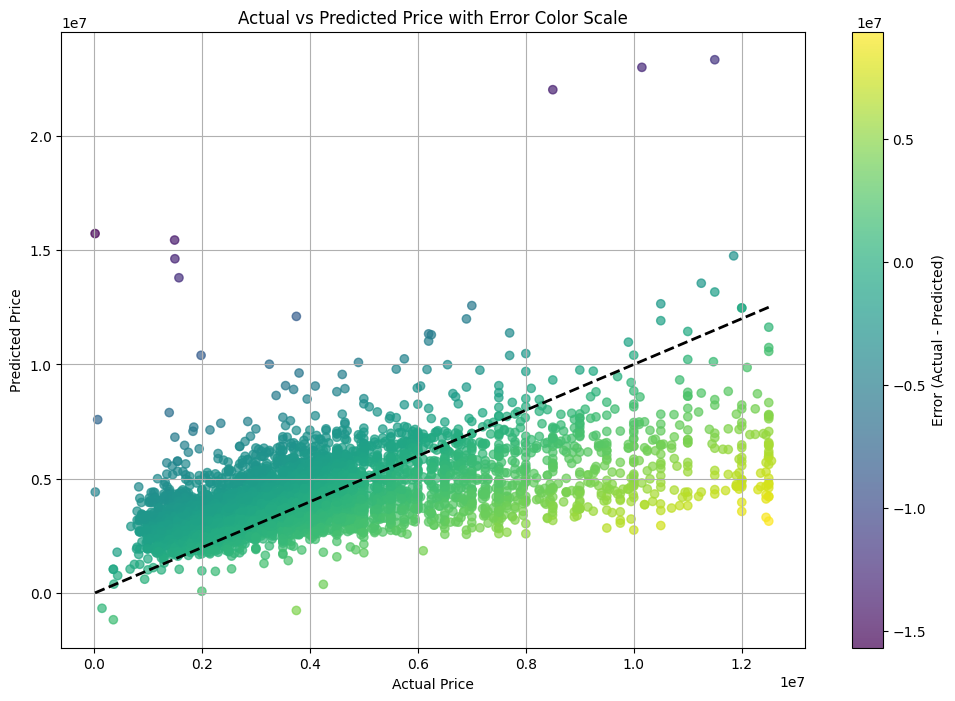

In [30]:
import numpy as np

# Calculate errors
errors = y_test - y_pred

# Plotting Actual vs Predicted prices with error color scale
plt.figure(figsize=(12, 8))
sc = plt.scatter(y_test, y_pred, alpha=0.7, c=errors)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with Error Color Scale')
plt.colorbar(sc, label='Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()


In [31]:
# Calculate the difference between predicted and actual prices
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions['Difference'] = df_predictions['Predicted'] - df_predictions['Actual']

df_predictions_sorted = df_predictions.sort_values(by='Difference', ascending=False)

# Get the top listings with the highest predicted-actual difference
top_listings = df_predictions_sorted.head()

# Retrieve the indices of the top listings with the highest differences
top_listings_indices = top_listings.index

full_details_top_listings = df.loc[top_listings_indices]

print(full_details_top_listings)



      tradeTypeName                                              title  \
4686        satılık  bahçeşehi̇r 2.kisim vi̇lla 4+1 bahçeli̇ satili...   
24822       satılık  köse i̇nşaattan satilik bahce kat kullanişli a...   
1280        satılık  ispartakule bi̇zi̇mevler4  si̇tesi̇nde full eş...   
12158       satılık  eyüpsultan yeşilpınar bölgeleri kat karşılığı ...   
26445       satılık                saloon residence 3+1 satılık daire,   

                                                     url  \
4686   https://imaj.emlakjet.com/ilan/bahcesehir-2-ki...   
24822  https://imaj.emlakjet.com/ilan/kose-insaattan-...   
1280   https://imaj.emlakjet.com/ilan/ispartakule-biz...   
12158  https://imaj.emlakjet.com/ilan/eyupsultan-yesi...   
26445  https://imaj.emlakjet.com/ilan/saloon-residenc...   

                                                  images  \
4686   https://imaj.emlakjet.com/listing/14642363/E67...   
24822  https://imaj.emlakjet.com/listing/14842818/D8E...   
1280   https:/

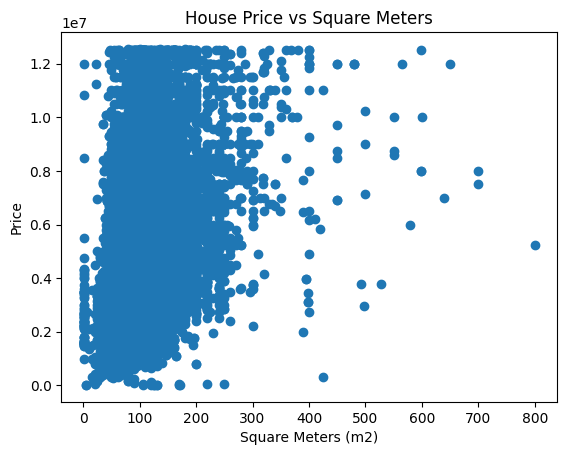

In [33]:
# Net Square Price Relation
import matplotlib.pyplot as plt

plt.scatter(df['net_square'], df['price'])
plt.title('House Price vs Square Meters')
plt.xlabel('Square Meters (m2)')
plt.ylabel('Price')
plt.show()


In [37]:
correlation = df['net_square'].corr(df['price'])
print(f'The correlation coefficient between m2 and price is: {correlation}')


The correlation coefficient between m2 and price is: 0.3761397609543411


In [40]:
#Regression Analysis
from sklearn.linear_model import LinearRegression

# Reshaping the data for sklearn
X = df['net_square'].values.reshape(-1, 1)
y = df['price'].values

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Set squared=False for RMSE
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² score: {r2}')


RMSE: 2256497.927649293
R² score: 0.14161612458893258


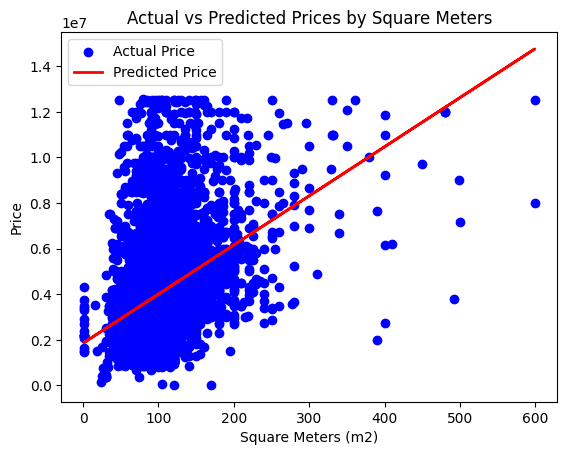

In [41]:
# Scatter plot of actual prices vs. m2
plt.scatter(X_test, y_test, color='blue', label='Actual Price')

# Line plot of predicted prices vs. m2
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Price')

plt.title('Actual vs Predicted Prices by Square Meters')
plt.xlabel('Square Meters (m2)')
plt.ylabel('Price')
plt.legend()
plt.show()


RMSE with room count: 2224543.828885428
R² score with room count: 0.1657550113256726


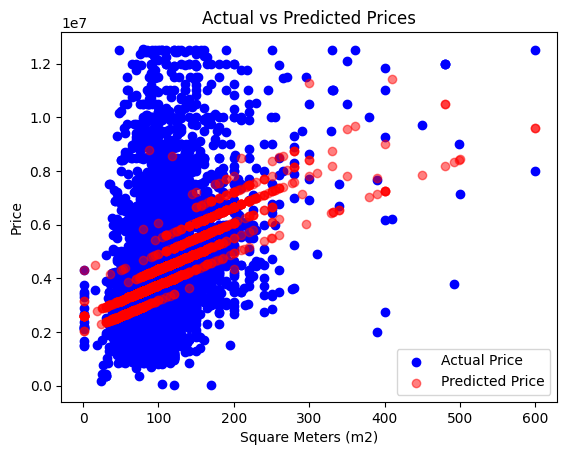

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Impute the NaN values for both 'net_square' and 'room_count' columns at once
imputer = SimpleImputer(strategy='median')
df[['net_square', 'room_count']] = imputer.fit_transform(df[['net_square', 'room_count']])

# Proceed with the rest of the code
X = df[['net_square', 'room_count']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE with room count: {rmse}')
print(f'R² score with room count: {r2}')

# Plot Actual vs Predicted Prices
plt.scatter(X_test['net_square'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['net_square'], y_pred, color='red', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Square Meters (m2)')
plt.ylabel('Price')
plt.legend()
plt.show()


Random Forest RMSE: 2154862.4597006566
Random Forest R² score: 0.21720006043943496


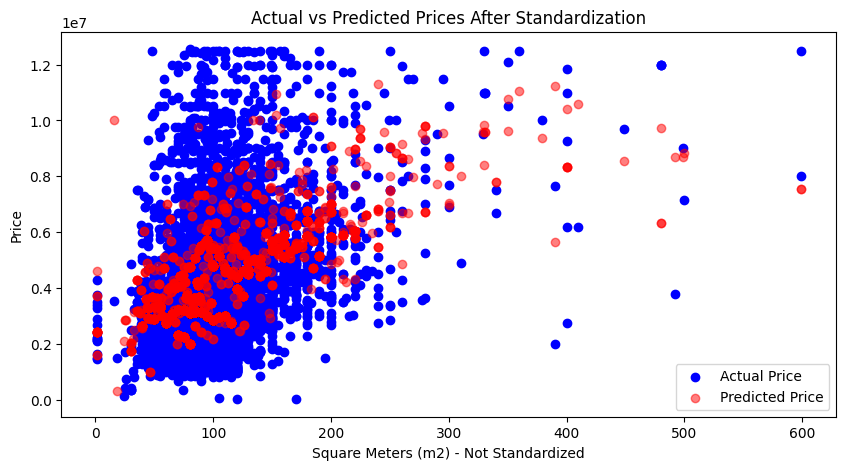

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = df[['net_square', 'room_count']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R² score: {r2_rf}')

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(X_test['net_square'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['net_square'], y_pred_rf, color='red', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Prices After Standardization')
plt.xlabel('Square Meters (m2) - Not Standardized')
plt.ylabel('Price')
plt.legend()
plt.show()


RMSE with room and bath count, excluding NaNs: 2165475.8251427724
R² score with room and bath count, excluding NaNs: 0.21640017898265917


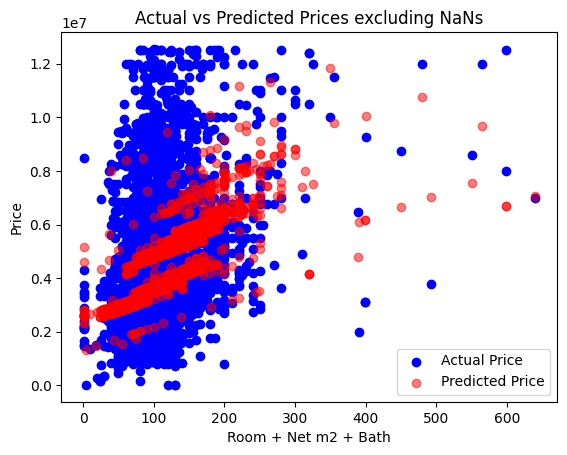

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd


# Replace 'Yok' with 0 for 'bath_count', 'room_count', and 'net_square'
df['bath_count'] = df['bath_count'].replace('Yok', 0)
df['room_count'] = df['room_count'].replace('Yok', 0)
df['net_square'] = df['net_square'].replace('Yok', 0)

# Convert columns to numeric type. If conversion fails due to other invalid entries, NaN will be assigned
df['bath_count'] = pd.to_numeric(df['bath_count'], errors='coerce')
df['room_count'] = pd.to_numeric(df['room_count'], errors='coerce')
df['net_square'] = pd.to_numeric(df['net_square'], errors='coerce')

# Filter out rows with NaN values resulting from the conversion
df_no_nan = df.dropna(subset=['net_square', 'room_count', 'bath_count'])

# Prepare the features and target variable from the filtered dataset
X = df_no_nan[['net_square', 'room_count', 'bath_count']]  # Now X will only contain rows without NaNs
y = df_no_nan['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE with room and bath count, excluding NaNs: {rmse}')
print(f'R² score with room and bath count, excluding NaNs: {r2}')

# Plot Actual vs Predicted Prices
plt.scatter(X_test['net_square'], y_test, color='blue', label='Actual Price')  # Using 'net_square' for the x-axis
plt.scatter(X_test['net_square'], y_pred, color='red', label='Predicted Price', alpha=0.5)
plt.title('Actual vs Predicted Prices excluding NaNs')
plt.xlabel('Room + Net m2 + Bath')
plt.ylabel('Price')
plt.legend()
plt.show()


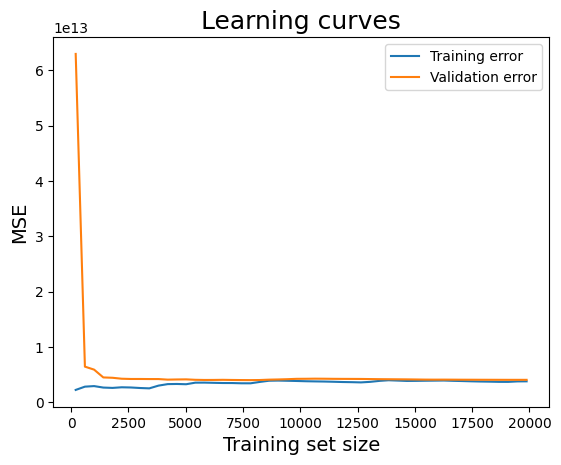

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X, y=y,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18)
plt.legend()


In [ ]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Get the correlation of all features with the target variable 'price', sort them by absolute value
correlation_with_price = correlation_matrix['price'].drop('price').apply(abs).sort_values(ascending=False)

# Print the sorted correlation values
print(correlation_with_price)


tlPrice                             1.000000
gross_square                        0.429641
room_count                          0.395970
net_square                          0.376140
heating_type_Kombi Doğalgaz         0.262210
heating_type_Merkezi (Pay Ölçer)    0.244974
estateTypeName_daire                0.233921
floor_count                         0.205814
floor_number                        0.195673
estateTypeName_villa                0.189005
heating_type_Yerden Isıtma          0.152657
opportunity                         0.106231
build_age                           0.103403
estateTypeName_residence            0.085062
estateTypeName_müstakil ev          0.078830
heating_type_Merkezi Doğalgaz       0.072933
heating_type_Doğalgaz Sobalı        0.062750
estateTypeName_prefabrik            0.051176
build_status_Sıfır                  0.046129
build_status_İkinci El              0.041747
firstPrice                          0.037920
build_status_Yapım Aşamasında       0.033522
difference

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'X' and 'y' are already defined

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)


In [ ]:
# Assuming 'X' is a DataFrame and not just a numpy array so we have column names
feature_importance = pd.Series(index=X.columns, data=lasso.coef_)

# Features with non-zero coefficients
selected_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Selected features and their coefficients:")
print(selected_features)


Selected features and their coefficients:
gross_square                        776382.321084
room_count                          670088.255778
heating_type_Merkezi (Pay Ölçer)    422278.726990
heating_type_Yerden Isıtma          294033.825914
floor_count                         244877.773821
heating_type_Merkezi Doğalgaz       160226.442179
differenceRate                      141135.218511
heating_type_Fancoil Ünitesi         58706.886148
floor_number                         54712.718208
heating_type_Merkezi Kömür           22721.527481
heating_type_Klimalı                 22320.196277
build_status_Yapım Aşamasında        14370.865142
previousPrice                        13967.769837
heating_type_Kat Kaloriferi            -79.437164
heating_type_Şömine                   -517.536496
heating_type_Kombi Katı Yakıt         -769.921107
estateTypeName_çiftlik evi           -1574.277460
estateTypeName_yalı                  -4692.828985
estateTypeName_köy evi               -7716.087804
heating_

In [ ]:
# Assuming you've already obtained the Lasso coefficients
non_zero_coefs = feature_importance[feature_importance != 0].index.tolist()

# Refine your features DataFrame
X_refined = X[non_zero_coefs]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_refined, y, test_size=0.2, random_state=42)


In [ ]:
# Using Lasso with the optimal alpha found previously
from sklearn.linear_model import Lasso

lasso_optimal = Lasso(alpha=lasso.alpha_)
lasso_optimal.fit(X_train, y_train)


Lasso(alpha=6056.857995698453)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso_optimal, X_refined, y, cv=5, scoring='neg_mean_squared_error')
print(f"Mean Cross-Validated MSE: {np.mean(scores)}")


Mean Cross-Validated MSE: -4137847358281.5405


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lasso_optimal.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R^2: {r2}")


Test MSE: 4037791848112.2754
Test R^2: 0.3193002363872557


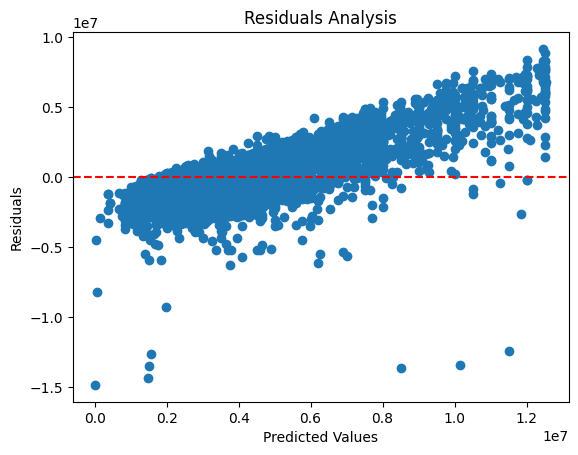

In [ ]:
residuals = y_test - y_pred

plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Analysis')
plt.show()
